In [61]:
#imports
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
#reading in the data
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


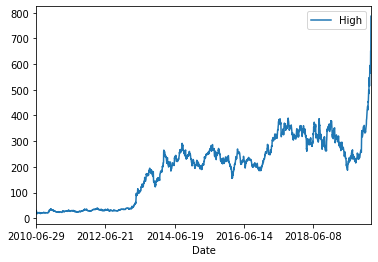

In [8]:
#visualizing what the time-series data looks like
df.plot(x="Date", y="High")

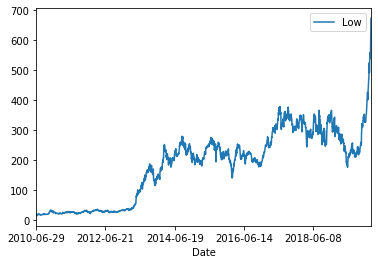

In [9]:
df.plot(x="Date", y="Low")

In [19]:
#Start by normalizing data to achieve better results - gonna start by looking/trying to predict the high
#Then will form a more sophisticated model
#turns the column of high into an array
training_set = df.iloc[:, 2:3].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(2416, 1)


In [47]:
x_train = []
y_train = []
x_test = []

#transform data into the 3D array which will be inputted into the LSTM network
for i in range(60, 2356):
    #create data in 60 timestamps before converting it to a numpy array
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
#.shape[0] gets rows and [1] gets columns - reshape trainning data to get 3D input into the LSTM
#if we were using more than 1 feature, we would have >1 for the third axis
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

for i in range(2356, 2416):
    x_test.append(training_set_scaled[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


(2296, 60)
(2296, 60, 1)


In [44]:
#creating the LSTM model
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
2296/2296 [==============================] - 55s 24ms/step - loss: 0.0064
Epoch 2/5
2296/2296 [==============================] - 66s 29ms/step - loss: 0.0014
Epoch 3/5
2296/2296 [==============================] - 61s 27ms/step - loss: 0.0014
Epoch 4/5
2296/2296 [==============================] - 88s 38ms/step - loss: 0.0013
Epoch 5/5
2296/2296 [==============================] - 45s 20ms/step - loss: 0.0012


In [50]:
#predicting the stock prices from the model
predicted_stock_price = model.predict(x_test)
#remember from our data, we applied the MaxMinScaler, so we have to reverse the transform to get our actual results
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[279.62952]
 [284.01276]
 [288.2964 ]
 [292.44614]
 [296.46545]
 [300.36597]
 [304.16916]
 [307.87875]
 [311.4782 ]
 [314.9403 ]
 [318.25284]
 [321.40918]
 [324.40128]
 [327.1598 ]
 [329.6195 ]
 [331.70752]
 [333.36774]
 [334.56674]
 [335.31763]
 [335.66803]
 [335.68436]
 [335.42938]
 [334.9769 ]
 [334.41476]
 [333.84137]
 [333.3594 ]
 [333.0649 ]
 [333.031  ]
 [333.3493 ]
 [334.08698]
 [335.29584]
 [337.01974]
 [339.27823]
 [342.0733 ]
 [345.37564]
 [349.13916]
 [353.29245]
 [357.71927]
 [362.2613 ]
 [366.7856 ]
 [371.24857]
 [375.6262 ]
 [379.9537 ]
 [384.3417 ]
 [388.88303]
 [393.57947]
 [398.4918 ]
 [403.71677]
 [409.27783]
 [415.06326]
 [420.90967]
 [426.7382 ]
 [432.6206 ]
 [438.6011 ]
 [444.65387]
 [450.68036]
 [456.58923]
 [462.3285 ]
 [468.0249 ]
 [473.8136 ]]


In [58]:
real_stock_prices = df["High"].iloc[2356: 2416].values
real_stock_prices = real_stock_prices.reshape(-1,1)
print(real_stock_prices.shape)

(60, 1)


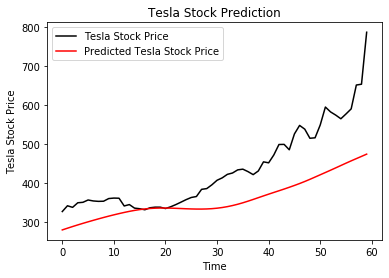

In [63]:
#plot the predicted stocks and the actual stocks to see how close our predictions were
plt.plot(real_stock_prices, color = 'black', label = 'Tesla Stock Price')
plt.plot(predicted_stock_price, color='red', label = 'Predicted Tesla Stock Price')
plt.title("Tesla Stock Prediction")
plt.xlabel("Time")
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()